# Assignment 1

## Exercise 1

#### Write a function temp_tester that takes a definition of normal body temperature and returns a function that returns True if its argument is within 1 degree of normal temperature (i.e. the value is a healthy temperature), and False if not (12 points). Test your code with the following (include a copy of your tests in your GitHub repository) (13 points):

##### Important: this question is not really about chickens. Do not hard-code special cases for chickens and humans. This should also work for whatever temperature we consider normal.

In terms of our "Good enough practices", having a generic function that makes other functions as needed is a function (2b) that itself eliminates duplication (2c) by generating these other functions. We're not testing libraries here (2e), but testing our code is obviously important too.

#### First, we eliminate duplicates by creating tester

In [159]:
tester = ('chicken', 'human', 'bat', 'rat', 'dog', 'cat', 'whatever')

#### Then, we create the function

In [3]:
def temp_tester(x):
    def tester(t):
        if abs(t-x) <= 1:
            return 'True'
        else:
            return 'False'
    return tester

#### Finally, we test the code:

In [4]:
human_tester = temp_tester(37)
chicken_tester = temp_tester(41.1)

print(chicken_tester(42)) # True -- i.e. not a fever for a chicken
print(human_tester(42))   # False -- this would be a severe fever for a human
print(chicken_tester(43)) # False
print(human_tester(35))   # False -- too low
print(human_tester(98.6)) # False -- normal in degrees F but our reference temp was in degrees C

True
False
False
False
False


## Exercise 2

#### Examine data. What columns does it have? (2 points) How many rows (think: people) does it have? (2 points)

Examine the distribution of the ages in the dataset. In particular, be sure to have your code report the mean, standard deviation, minimum, maximum. (2 points) Plot a histogram of the distribution with an appropriate number of bins for the size of the dataset (describe in your readme the role of the number of bins). (3 points) Comment on any outliers or patterns you notice in the distribution of ages. (1 point)

In [395]:
import pandas as pd
import sqlite3
with sqlite3.connect("hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

#### First, we create dataframe and find mean, std, max and min

In [396]:
data_df = pd.DataFrame.from_dict(data)
data_df

,name,age,weight,eyecolor
0,Edna Phelps,88.895690,67.122450,brown
1,Cara Yasso,9.274597,29.251244,brown
2,Gail Rave,18.345613,55.347903,brown
3,Richard Adams,16.367545,70.352184,brown
4,Krista Slater,49.971604,70.563859,brown
...,...,...,...,...
152356,John Fowler,23.930833,71.532569,blue
152357,Diana Shuffler,21.884819,67.936753,brown
152358,Kevin Cuningham,87.705907,60.074646,brown
152359,James Libengood,21.727666,81.774985,brown


It has 152361 rows and 4 columns

In [397]:
age = data_df['age']
mean_age = age.mean()
std_age = age.std()
max_age = age.max()
min_age = age.min()
print(f'The mean age is {format(mean_age,".2f")} years')
print(f'The age standard deviation is {format(std_age,".2f")} years')
print(f'The maximum age is {format(max_age,".2f")} years')
print(f'The minimum age is {format(min_age,".5f")} years')

The mean age is 39.51 years
The age standard deviation is 24.15 years
The maximum age is 99.99 years
The minimum age is 0.00075 years


#### Plot a histogram of the distribution with an appropriate number of bins for the size of the dataset

<AxesSubplot:xlabel='Age', ylabel='Frequency'>

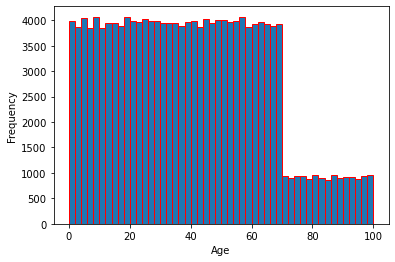

In [402]:
plot = age.plot (kind = "hist", figsize=(6,4), edgecolor = "red", bins = 50)
plot.set_xlabel("Age")
plot.set_ylabel("Frequency")
plot

Here, I decided to select bins = 50. This means that the plot shows the distribution over a two-year interval. It seems quite reasonable in terms of visbility. 

There are no outliers but we can clearly identidy two patterns. From 70 years old, the age frequency drastically decreases. This can be associated to an increase mortality rate from 70 y-o.

#### Repeat the above for the distribution of weights. (3 points)

In [403]:
weight = data_df['weight']
mean_weight = weight.mean()
std_weight = weight.std()
max_weight = weight.max()
min_weight = weight.min()
print(f'The mean weight is {format(mean_weight,".2f")} kgs' )
print(f'The weight standard deviation is {format(std_weight,".2f")} kgs')
print(f'The maximum weight is {format(max_weight,".2f")} kgs')
print(f'The minimum weight is {format(min_weight,".2f")} kgs')

The mean weight is 60.88 kgs
The weight standard deviation is 18.41 kgs
The maximum weight is 100.44 kgs
The minimum weight is 3.38 kgs


<AxesSubplot:ylabel='Frequency'>

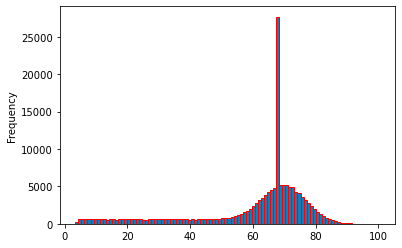

In [407]:
plot_weight = weight.plot (kind = "hist", figsize=(6,4), edgecolor = "red", bins = 100)
plot.set_xlabel("Age")
plot.set_ylabel("Frequency")
plot_weight

Here for more visbility over the pattern, I decided to use bins=100 to cleary identify the weight at which there is a higher frequency. 

We can see that at 69kgs there is a significant increase in terms of weight frequency.

#### Make a scatterplot of the weights vs the ages. (3 points) Describe the general relationship between the two variables (3 points). You should notice at least one outlier that does not follow the general relationship. What is the name of the person? (3 points) Be sure to explain your process for identifying the person whose values don't follow the usual relationship in the readme. (3 points)

<AxesSubplot:xlabel='age', ylabel='weight'>

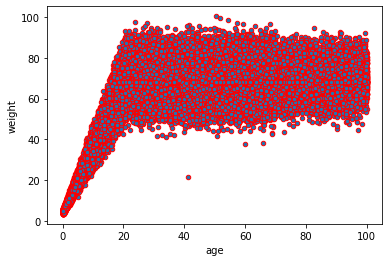

In [408]:
scatter_plot = data_df.plot(x = 'age', y = 'weight', kind="scatter",figsize=(6,4), edgecolor= 'red')
plot.set_xlabel("Age")
plot.set_ylabel("Weight")
scatter_plot

In [410]:
data_df[weight<30][age>40]

/var/folders/v6/68fvhs1j4fbb7gk9rmw6_jzw0000gn/T/ipykernel_92036/2982551565.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_df[weight<30][age>40]


,name,age,weight,eyecolor
537,Anthony Freeman,41.3,21.7,green


Easiest way to get the name from the plot is to visually identify the y-axis and x-axis treshhold (here 30 and 40) and find the output from the data dataframe using these two conditions.

## Exercise 3

#### Make a function that takes a list of state names and plots their new cases vs date using overlaid line graphs, one for each selected state. (Note: the data file shows running totals, so you'll have to process it to get new case counts.) Be sure to provide a way to tell which line corresponds to what state (one possibility: using colors and a legend). If your approach has any specific limitations, explain them in your readme.

In [413]:
import pandas as pd
data = pd.read_csv("us-states.csv")

#### First, we create the dataframe

In [414]:
states_df = pd.DataFrame.from_dict(data)
states_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
51465,2022-09-17,Virginia,51,2070182,21679
51466,2022-09-17,Washington,53,1801179,14233
51467,2022-09-17,West Virginia,54,595044,7364
51468,2022-09-17,Wisconsin,55,1851892,15190


In [416]:
states_df.dtypes[0:2]

date     object
state    object
dtype: object

#### We convert date to datetime

In [417]:
states_df['date'] = pd.to_datetime(states_df['date'], format='%Y-%m-%d')

In [418]:
states_df.dtypes[0:2]

date     datetime64[ns]
state            object
dtype: object

#### We pivot the dataframe to have the states in columns

In [419]:
states_df_w=states_df.pivot(index = 'date', columns='state', values = "cases") # date: index & values = cases
states_df_w

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,1509880.0,300946.0,8217.0,2258040.0,942925.0,11169894.0,1648568.0,884941.0,305109.0,166893.0,...,2262682.0,7817015.0,1032402.0,140740.0,22970.0,2064992.0,1796343.0,593041.0,1847431.0,175746.0
2022-09-14,1511092.0,302448.0,8217.0,2264159.0,943944.0,11171759.0,1649212.0,885767.0,305284.0,167242.0,...,2263911.0,7826318.0,1032402.0,141282.0,22970.0,2066675.0,1796368.0,593806.0,1848935.0,175746.0
2022-09-15,1512134.0,302448.0,8217.0,2264159.0,944789.0,11194286.0,1651324.0,886348.0,305517.0,167342.0,...,2265435.0,7827898.0,1034893.0,141282.0,23018.0,2068350.0,1796560.0,594355.0,1850559.0,175746.0


#### In order to have the number of new cases, we can use the diff function as follows:

In [420]:
invert_cases = states_df_w.diff(axis=0, periods = 1) ##difference with previous row
invert_cases

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,1572.0,0.0,0.0,0.0,841.0,1633.0,930.0,3110.0,147.0,0.0,...,3306.0,1084.0,0.0,0.0,0.0,2008.0,0.0,717.0,1331.0,456.0
2022-09-14,1212.0,1502.0,0.0,6119.0,1019.0,1865.0,644.0,826.0,175.0,349.0,...,1229.0,9303.0,0.0,542.0,0.0,1683.0,25.0,765.0,1504.0,0.0
2022-09-15,1042.0,0.0,0.0,0.0,845.0,22527.0,2112.0,581.0,233.0,100.0,...,1524.0,1580.0,2491.0,0.0,48.0,1675.0,192.0,549.0,1624.0,0.0


#### Finally, we plot the graph with cumulative sums

Text(0, 0.5, 'Cumulative cases')

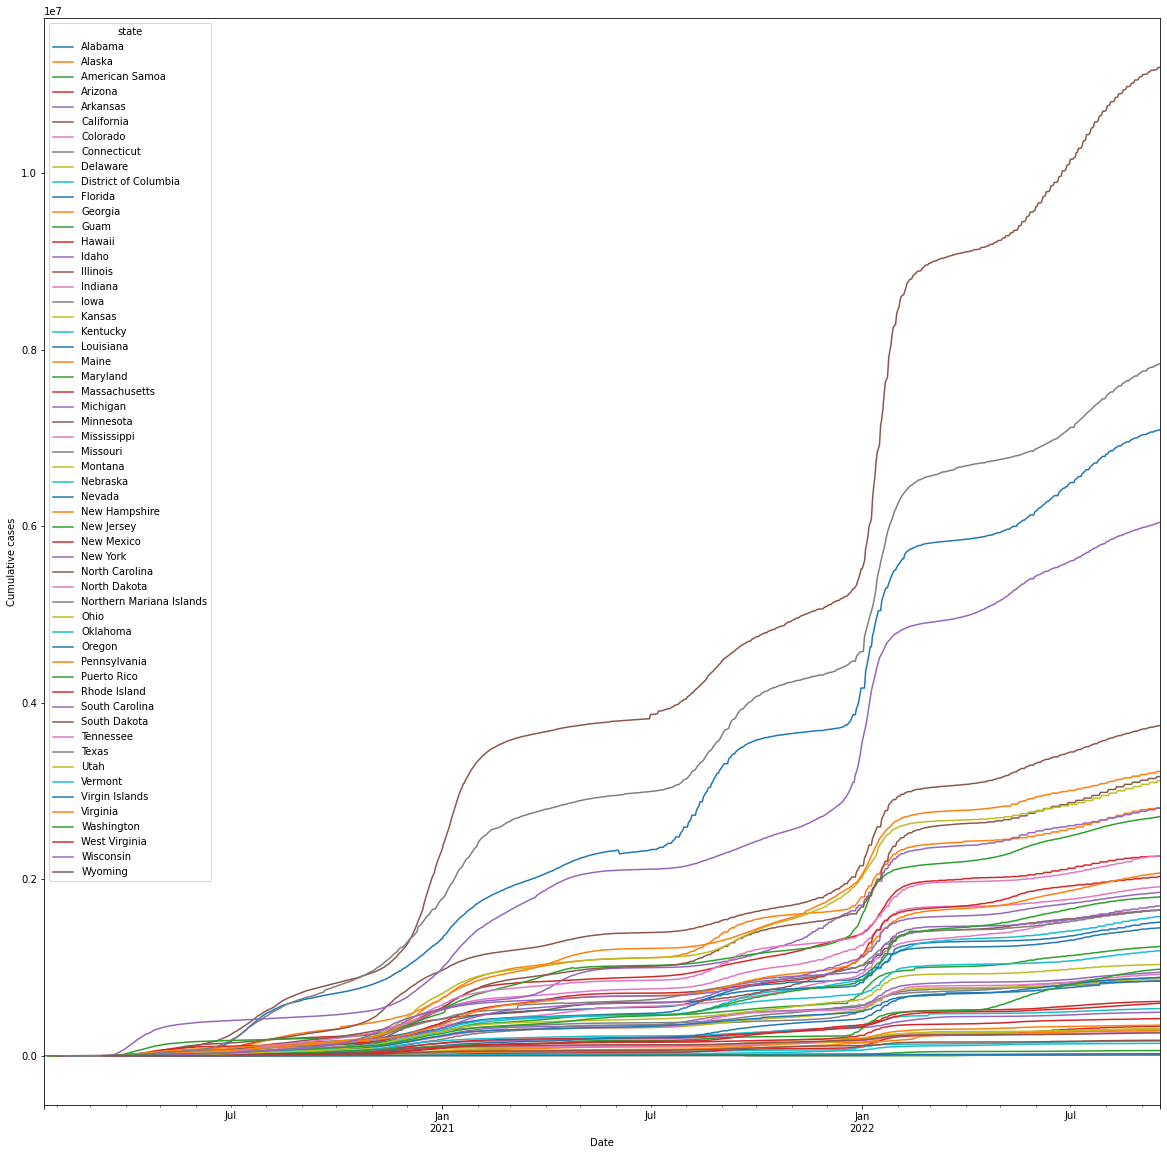

In [421]:
plot = states_df_w.plot(kind="line", figsize=(20,20))
plot.set_xlabel("Date")
plot.set_ylabel("Cumulative cases")

#### Now, we can plot the graph that shows the number of new cases for two given startes as:

state_aIowa
state_bIllinois


Text(0, 0.5, 'New cases')

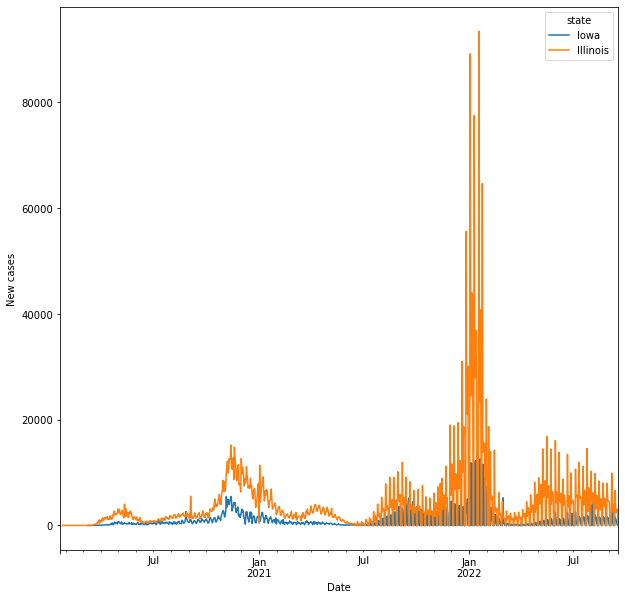

In [425]:
plot = invert_cases.filter(items = [input('state_a'), input('state_b')]).plot(kind="line", 
                                                                                                figsize=(10,10))
plot.set_xlabel("Date")
plot.set_ylabel("New cases")

#### Test the above function and provide examples of it in use.

#### Make a function that takes the name of a state and returns the date of its highest number of new cases.

In [191]:
def date_highest_cases():
    date = invert_cases[input('state')].idxmax() ##input the state and return the index of maximum value
    return f"The highest number of cases is on {date}"
date_highest_cases()

stateConnecticut


'The highest number of cases is on 2022-01-10 00:00:00'

#### Make a function that takes the names of two states and reports which one had its highest number of daily new cases first and how many days separate that one's peak from the other one's peak. (5 points) (Edit: 2022-09-14: clarification that we're talking about the peak of daily new cases, not of the total number of cases.)

In [188]:
def maximum(state_1, state_2): #funtion 1 : tells state w/ maximum
     
    if invert_cases[state_1].max() >= invert_cases[state_2].max():
        return f"The state with the highest peak is {state_1}"
    else:
        return f"The state with the highest peak is {state_2}"


def time_delta(): #funtion 2 : gives time delta
    delta = abs(invert_cases[state_1].idxmax() - invert_cases[state_2].idxmax()) #taking the absolute value
    return f"The time delta is {delta}"

#### Test the above function and provide examples of it in use.

In [190]:
state_1 = input('state') ##input the states
state_2 = input('state')

print(maximum(state_1, state_2))
print(time_delta())

stateNew York
stateMaine
The state with the highest peak is New York
The time delta is 38 days 00:00:00


An example can be two predict the time at which an crime can happen at a given city regarding the peak difference between all the states. For instance, if an incident happens in New York, it can help the police can increase vigilance in Main over the 38 following days. 

## Exercise 4

Write Python code that reads the XML and reports:
the DescriptorName associated with DescriptorUI D007154 (the text of the name is nested inside a String tag) (5 points)
the DescriptorUI (MeSH Unique ID) associated with DescriptorName "Nervous System Diseases" (5 points)
the DescriptorNames of items in the MeSH hierarchy that are children of both "Nervous System Diseases" and D007154. (That is, each item is a subtype of both, as defined by its TreeNumber(s).) (5 points)

Explain briefly in terms of biology/medicine what the above search has found. (5 points)
Do these tasks using functions (e.g. write a generic function that returns DescriptorName given a DescriptorUI) instead of writing single use code. (5 points)

In [2]:
import xml.etree.ElementTree as ET
from pprint import pprint as pp 
tree = ET.parse('desc2022.xml')
root = tree.getroot()

### Find DescriptorName associated with DescriptorUI : D007154

In [305]:
for record in root:
    descriptorUI = record.findtext('DescriptorUI')     
    if descriptorUI == 'D007154':
            print (record.findtext('DescriptorName/'))

Immune System Diseases


### To find the MeshID, we can proceed in the same way (in reverse) as:

In [278]:
for record in root:
    descriptorname = record.find("DescriptorName/")
    name = descriptorname.text  
    if name == 'Nervous System Diseases':
        print (name)
        print(record.findtext('DescriptorUI'))

Nervous System Diseases
D009422


### To find DescriptorNames of items in the MeSH hierarchy that are children of both "Nervous System Diseases" and D007154:

In [377]:
for record in root:
    descriptorname = record.find("DescriptorName/")
    name = descriptorname.text 
    descriptorUI = record.findtext('DescriptorUI')  
    if name == 'Nervous System Diseases' or descriptorUI == "D007154":
        solution = record.findtext('TreeNumberList/')
        #print (name)
        print(solution)

C20
C10


### Same tasks by creating a function

In [367]:
def find_descriptor_name(t):
    for record in root:
        descriptorUI = record.findtext('DescriptorUI') 
        if descriptorUI == t:
            return record.findtext('DescriptorName/')

find_descriptor_name(t = 'D007154')

'Immune System Diseases'

In [368]:
def find_descriptor_UI(x):
    for record in root:
        descriptorname = record.find("DescriptorName/")
        name = descriptorname.text  
        if name == x:
            return record.findtext('DescriptorUI')

find_descriptor_UI(x = 'Nervous System Diseases')

'D009422'

In [392]:
def find_both(x,t):
    for record in root:
        descriptorname = record.find("DescriptorName/")
        name = descriptorname.text 
        descriptorUI = record.findtext('DescriptorUI')  
        if name == x or descriptorUI == t:
            solution = record.findtext('TreeNumberList/')
            return solution

find_both(x = 'Nervous System Diseases', t = 'D007154')

'C20'

### Explain briefly in terms of biology/medicine what the above search has found.

In terms of biology/medicine, this means that each disease (aka descriptor name) has a unique MeshID (descriptor UI) which helps in computing and manipulating large datasets. A Mesh based literature is therefore really useful for biocomputation through indexing, cataloging and searching for specific bioinformation. We can also notice that thanks to its hierarchical structure, it is useful in searching for information at different specific levers (e.g., q3)